<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/05.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch05_10_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%8B%A4%EC%8A%B5_%EB%B9%84%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.10. 사이킷런 실습 - 비선형회귀분석

---
* 날짜:
* 이름:

## 학습내용
    - 다항식을 이용한 회귀 분석을 진행한다.
    - 랜덤 포레스트를 이용해 비선형 회귀를 진행한다.
    - 앙상블 학습에 대해 이해한다.

```
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/DeepLearningFrameWork/script')

from data_loader import *
from score_dict import *

## **선형 회귀 모델을 다항 회귀로 변환**
---

### **| 간단한 데이터에 대한 다항 회귀**

#### **데이터**
```
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0]).reshape(-1, 1)

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])
```

* 데이터 생성

In [ ]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0]).reshape(-1, 1)

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])
X.shape, y.shape

((10, 1), (10,))

* 시각화

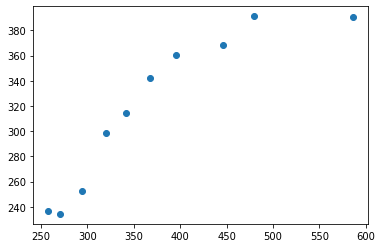

In [ ]:
plt.scatter(X, y);

#### **선형 특성 학습**

In [ ]:
from sklearn.linear_model import LinearRegression

lr1 =LinearRegression()
lr1.fit(X,y)

LinearRegression()

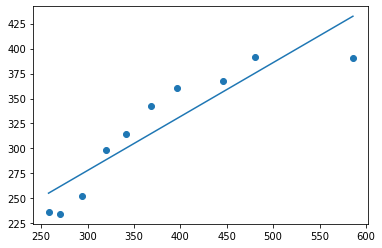

In [ ]:
plt.scatter(X,y)
y_pred = lr1.predict(X)
plt.plot(X, y_pred);

#### **이차항 특성 학습**


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# x가 1차항 -> 다차항으로 변환 
quad = PolynomialFeatures(degree = 2) # 차수 지정

* X 데이터 변환

In [ ]:
# X 변환  
X_quad = quad.fit_transform(X)
X.shape, X_quad.shape

((10, 1), (10, 3))

In [ ]:
quad.get_feature_names()
pd.DataFrame(X_quad, columns = quad.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,x0,x0^2
0,1.0,258.0,66564.0
1,1.0,270.0,72900.0
2,1.0,294.0,86436.0
3,1.0,320.0,102400.0
4,1.0,342.0,116964.0
5,1.0,368.0,135424.0
6,1.0,396.0,156816.0
7,1.0,446.0,198916.0
8,1.0,480.0,230400.0
9,1.0,586.0,343396.0


* 학습

In [ ]:
lr2 = LinearRegression() # 똑같은 모델 but 인풋이 다차항이다.
lr2.fit(X_quad, y)

LinearRegression()

#### **테스트셋 성능 비교**

In [ ]:
y_pred1 = lr1.predict(X)
lr1_scores = regression_scores(y, y_pred1)

y_pred2 = lr2.predict(X_quad)
lr2_scores = regression_scores(y, y_pred2)

pd.DataFrame([lr1_scores, lr2_scores])

,mse,rmse,mae,nmae,mape,r2
0,569.78,23.870,21.898,0.069,7.035,0.832
1,61.33,7.831,6.379,0.020,2.213,0.982


#### **그래프 시각화**

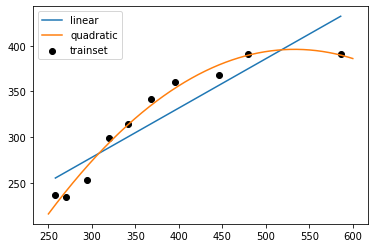

In [ ]:
X_every = np.arange(250, 600, 0.1).reshape(-1,1)
plt.scatter(X, y, label = 'trainset', c = 'k')
plt.plot(X, lr1.predict(X), label = 'linear')
plt.plot(X_every, lr2.predict(quad.fit_transform(X_every)), label = 'quadratic')
plt.legend()
plt.show()

### **| 주택 데이터를 이용한 비선형 회귀 분석**



#### **주택 데이터셋**

[https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

    
<pre>
01. CRIM     도시의 인당 범죄율
02. ZN       2만 5,0000평방 피트가 넘는 주택 비율
03. INDUS    도시에서 소매 업종이 아닌 지역 비율
04. CHAS     찰스 강 인접 여부(강 주변=1, 그외=0)
05. NOX      일산화질소 농도(10ppm당)
06. RM       주택의 평균 방 개수
07. AGE      1940년 이전에 지어진 자가 주택 비율
08. DIS      다섯 개의 보스턴 고용 센터까지 가중치가 적용된 거리
09. RAD      방사형으로 뻗은 고속도로까지 접근성 지수
10. TAX      10만 달러당 재산세율
11. PTRATIO  도시의 학생-교사 비율
12. B        1000(Bk - 0.63)^2 도시의 아프리카계 미국인 비율
13. LSTAT    저소득층 비율
14. MEDV     자가 주택의 중간가격 (단위 $1000s)
</pre>



* 데이터 불러오기


In [ ]:
X_train, X_test, y_train, y_test = housing_loader(['LSTAT']) # x 속성 선택
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(506, 14)


((404, 1), (102, 1), (404,), (102,))

* 시각화

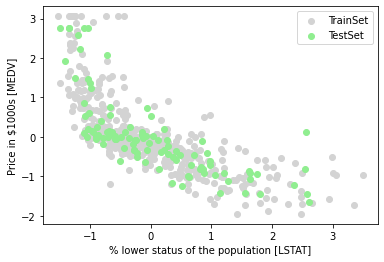

In [ ]:
def draw_data():
  plt.scatter(X_train, y_train, label='TrainSet', color='lightgray')
  plt.scatter(X_test, y_test, label='TestSet', color='lightgreen')
  plt.xlabel('% lower status of the population [LSTAT]')
  plt.ylabel('Price in $1000s [MEDV]')
  plt.legend()

draw_data()

#### **선형 모델 학습**

In [ ]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

#### **이차 다항 모델 학습**

In [ ]:
lr2 = LinearRegression()
quad = PolynomialFeatures(degree = 2)
X_quad = quad.fit_transform(X_train)
lr2.fit(X_quad, y_train)

LinearRegression()

#### **삼차 다항 모델 학습**

In [ ]:
lr3 = LinearRegression()
cubic = PolynomialFeatures(degree = 3)
X_cubic = cubic.fit_transform(X_train)
lr3.fit(X_cubic, y_train)

LinearRegression()

#### **테스트셋 성능 비교**

In [ ]:
# 예측
y_pred1 = lr1.predict(X_test)
y_pred2 = lr2.predict(quad.fit_transform(X_test)) # 이차항 변환
y_pred3 = lr3.predict(cubic.fit_transform(X_test)) # 삼차항 변환

# 성능 평가
lr1_scores = regression_scores(y_test, y_pred1)
lr2_scores = regression_scores(y_test, y_pred2)
lr3_scores = regression_scores(y_test, y_pred3)

# 데이터프레임으로 보기
df_scores = pd.DataFrame([lr1_scores, lr2_scores, lr3_scores], 
                         index = ['linear','quadratic','cubic'])
df_scores.style.background_gradient(cmap = 'Blues_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.463000,0.680000,0.501000,0.721000,671.832000,0.537000
quadratic,0.343000,0.586000,0.445000,0.640000,713.233000,0.657000
cubic,0.315000,0.562000,0.422000,0.606000,652.893000,0.685000


#### **그래프 시각화**

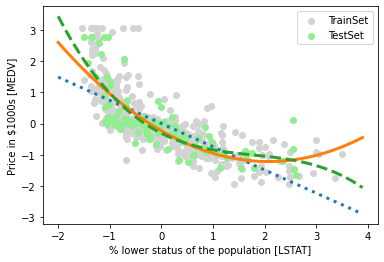

In [ ]:
draw_data()
X_every = np.arange(-2, 4, 0.1).reshape(-1,1)
plt.plot(X_every, lr1.predict(X_every), label = 'linear', linewidth = 3, linestyle = ':' ) # 1차항 
plt.plot(X_every, lr2.predict(quad.transform(X_every)), label = 'quadratic', linewidth = 3 ) # 2차항
plt.plot(X_every, lr3.predict(cubic.transform(X_every)), label = 'cubic', linewidth = 3, linestyle = '--' ) # 3차항 

## **랜덤 포레스트를 사용하여 비선형 관계 다루기**
---

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F96F6N%2FbtqwVglgV2S%2FYTCytd7Z2egbnbJM29MJv1%2Fimg.png)

*출처:  ratsgo's blog

### **| 결정트리 회귀**
* Decision Tree

#### **모델 학습**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state = 1, max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

#### **테스트셋 성능비교**

In [ ]:
y_pred = tree.predict(X_test)
score = regression_scores(y_test, y_pred)
df_scores.loc['tree'] = score # 행이라 loc 사용
df_scores.style.background_gradient(cmap = 'Blues_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.463000,0.680000,0.501000,0.721000,671.832000,0.537000
quadratic,0.343000,0.586000,0.445000,0.640000,713.233000,0.657000
cubic,0.315000,0.562000,0.422000,0.606000,652.893000,0.685000
tree,0.307000,0.554000,0.402000,0.578000,580.727000,0.693000


#### **그래프 시각화**

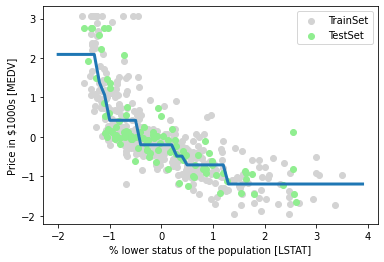

In [ ]:
draw_data()
plt.plot(X_every, tree.predict(X_every), lw = 3)
plt.show()

### **| 랜덤 포레스트 회귀 (Random Forest Regressor)**

#### **모델 학습**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state = 1)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

#### **테스트셋 성능 비교**

In [ ]:
y_pred = forest.predict(X_test)
score = regression_scores(y_test, y_pred)
df_scores.loc['forest'] = score
df_scores.style.background_gradient(cmap = 'Blues_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.463000,0.680000,0.501000,0.721000,671.832000,0.537000
quadratic,0.343000,0.586000,0.445000,0.640000,713.233000,0.657000
cubic,0.315000,0.562000,0.422000,0.606000,652.893000,0.685000
tree,0.307000,0.554000,0.402000,0.578000,580.727000,0.693000
forest,0.439000,0.663000,0.476000,0.685000,478.131000,0.561000


#### **그래프 시각화**

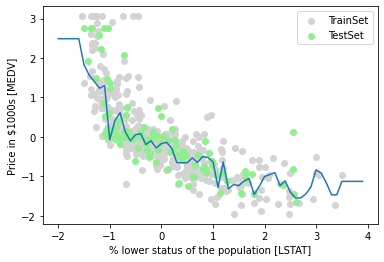

In [ ]:
draw_data()
plt.plot(X_every, forest.predict(X_every))
plt.show()

### **| 엑스트라 트리 (Extra Tree Regressor)**

#### **모델 학습**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(random_state = 1)
et.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

#### **테스트셋 성능 비교**

In [ ]:
y_pred = et.predict(X_test)
score = regression_scores(y_test, y_pred)
df_scores.loc['extra tree'] = score
df_scores.style.background_gradient(cmap = 'Blues_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.463000,0.680000,0.501000,0.721000,671.832000,0.537000
quadratic,0.343000,0.586000,0.445000,0.640000,713.233000,0.657000
cubic,0.315000,0.562000,0.422000,0.606000,652.893000,0.685000
tree,0.307000,0.554000,0.402000,0.578000,580.727000,0.693000
forest,0.439000,0.663000,0.476000,0.685000,478.131000,0.561000
extra tree,0.438000,0.662000,0.477000,0.686000,417.761000,0.562000


#### **그래프 시각화**

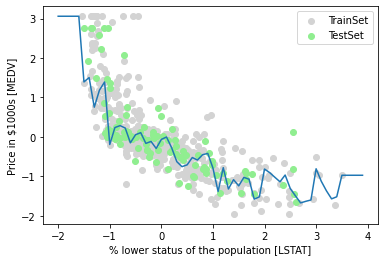

In [ ]:
draw_data()
plt.plot(X_every, et.predict(X_every))
plt.show()

### **| Gradient Boosting Regressor**

#### **모델 학습**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state = 1)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

#### **테스트셋 성능 비교**

In [ ]:
y_pred = gb.predict(X_test)
score = regression_scores(y_test, y_pred)
df_scores.loc['gradient boosting'] = score
df_scores.style.background_gradient(cmap = 'Blues_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.463000,0.680000,0.501000,0.721000,671.832000,0.537000
quadratic,0.343000,0.586000,0.445000,0.640000,713.233000,0.657000
cubic,0.315000,0.562000,0.422000,0.606000,652.893000,0.685000
tree,0.307000,0.554000,0.402000,0.578000,580.727000,0.693000
forest,0.439000,0.663000,0.476000,0.685000,478.131000,0.561000
extra tree,0.438000,0.662000,0.477000,0.686000,417.761000,0.562000
gradient boosting,0.336000,0.580000,0.409000,0.588000,410.178000,0.664000


#### **그래프 시각화**

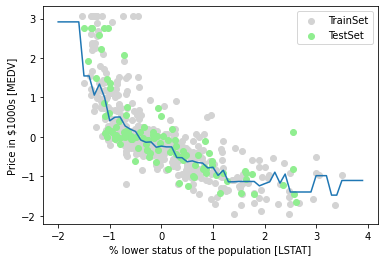

In [ ]:
draw_data()
plt.plot(X_every, gb.predict(X_every))
plt.show()

### **| XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor

#### **모델 학습**

In [ ]:
xgb = XGBRegressor(random_state = 1)
xgb.fit(X_train, y_train)

[08:33:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=1)

#### **테스트셋 성능 비교**

In [ ]:
y_pred = xgb.predict(X_test)
score = regression_scores(y_test, y_pred)
df_scores.loc['xgboost'] = score
df_scores.style.background_gradient(cmap = 'Blues_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.463000,0.680000,0.501000,0.721000,671.832000,0.537000
quadratic,0.343000,0.586000,0.445000,0.640000,713.233000,0.657000
cubic,0.315000,0.562000,0.422000,0.606000,652.893000,0.685000
tree,0.307000,0.554000,0.402000,0.578000,580.727000,0.693000
forest,0.439000,0.663000,0.476000,0.685000,478.131000,0.561000
extra tree,0.438000,0.662000,0.477000,0.686000,417.761000,0.562000
gradient boosting,0.336000,0.580000,0.409000,0.588000,410.178000,0.664000
xgboost,0.322000,0.567000,0.400000,0.574000,400.252000,0.678000


#### **그래프 시각화**

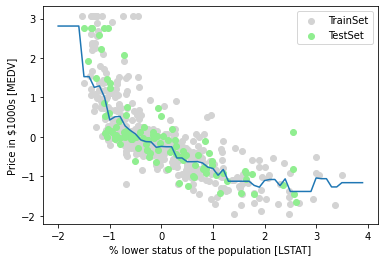

In [ ]:
draw_data()
plt.plot(X_every, xgb.predict(X_every))
plt.show()

## **과제1: 주택 데이터셋 다중 회귀 분석**
---

* 주택 데이터셋의 X의 모든 속성을 이용해 y를 예측합니다.
* 지난시간과 이번시간에 배운 회귀 분석 모델을 모두 사용해보고, 성능을 비교해 봅니다.
* 단, 다항회귀는 사용하지 마세요.
* 사용 모델 : 
```
'linear', 'ridge', 'lasso', 'elastic', 'bayes_ridge', 'tree', 'forest', 'et', 'gb', 'xgb'
```

#### **데이터 불러오기**

In [ ]:
X_train, X_test, y_train, y_test = housing_loader()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(506, 14)


((404, 13), (102, 13), (404,), (102,))

#### 분석

In [ ]:
from sklearn.linear_model import * 

# linear
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
# ridge
for a in [0.001, 0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha = a, random_state = 1)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print('--- a = {} ---'.format(a))
    print('성능 평가:{}'.format(regression_scores(y_test, y_pred)))

--- a = 0.001 ---
성능 평가:{'mse': 0.222, 'rmse': 0.471, 'mae': 0.362, 'nmae': 0.521, 'mape': 579.148, 'r2': 0.778}
--- a = 0.01 ---
성능 평가:{'mse': 0.222, 'rmse': 0.471, 'mae': 0.362, 'nmae': 0.521, 'mape': 579.172, 'r2': 0.778}
--- a = 0.1 ---
성능 평가:{'mse': 0.222, 'rmse': 0.471, 'mae': 0.362, 'nmae': 0.52, 'mape': 579.405, 'r2': 0.778}
--- a = 1 ---
성능 평가:{'mse': 0.221, 'rmse': 0.47, 'mae': 0.361, 'nmae': 0.519, 'mape': 581.614, 'r2': 0.779}
--- a = 10 ---
성능 평가:{'mse': 0.22, 'rmse': 0.469, 'mae': 0.358, 'nmae': 0.515, 'mape': 594.648, 'r2': 0.78}
--- a = 100 ---
성능 평가:{'mse': 0.249, 'rmse': 0.499, 'mae': 0.375, 'nmae': 0.539, 'mape': 595.514, 'r2': 0.751}


In [ ]:
ridge = Ridge(alpha = 10, random_state = 1)
ridge.fit(X_train, y_train)

Ridge(alpha=10, random_state=1)

In [ ]:
 # lasso
for a in [0.001, 0.01, 0.1, 1, 10, 100]:
    lasso = Lasso(alpha = a, random_state = 1)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    print('--- a = {} ---'.format(a))
    print('성능 평가:{}'.format(regression_scores(y_test, y_pred)))

--- a = 0.001 ---
성능 평가:{'mse': 0.221, 'rmse': 0.47, 'mae': 0.361, 'nmae': 0.519, 'mape': 587.754, 'r2': 0.779}
--- a = 0.01 ---
성능 평가:{'mse': 0.225, 'rmse': 0.475, 'mae': 0.362, 'nmae': 0.52, 'mape': 615.014, 'r2': 0.775}
--- a = 0.1 ---
성능 평가:{'mse': 0.315, 'rmse': 0.561, 'mae': 0.421, 'nmae': 0.606, 'mape': 549.237, 'r2': 0.685}
--- a = 1 ---
성능 평가:{'mse': 1.0, 'rmse': 1.0, 'mae': 0.696, 'nmae': 1.0, 'mape': 100.0, 'r2': 0.0}
--- a = 10 ---
성능 평가:{'mse': 1.0, 'rmse': 1.0, 'mae': 0.696, 'nmae': 1.0, 'mape': 100.0, 'r2': 0.0}
--- a = 100 ---
성능 평가:{'mse': 1.0, 'rmse': 1.0, 'mae': 0.696, 'nmae': 1.0, 'mape': 100.0, 'r2': 0.0}


In [ ]:
lasso = Lasso(alpha = 0.001, random_state = 1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=1)

In [ ]:
# elastic 
for a in [0.001, 0.01, 0.1, 1, 10, 100]:
    elastic = ElasticNet(alpha = a, random_state = 1)
    elastic.fit(X_train, y_train)
    y_pred = elastic.predict(X_test)
    print('--- a = {} ---'.format(a))
    print('성능 평가:{}'.format(regression_scores(y_test, y_pred)))

--- a = 0.001 ---
성능 평가:{'mse': 0.221, 'rmse': 0.47, 'mae': 0.361, 'nmae': 0.52, 'mape': 583.946, 'r2': 0.779}
--- a = 0.01 ---
성능 평가:{'mse': 0.221, 'rmse': 0.47, 'mae': 0.36, 'nmae': 0.517, 'mape': 601.713, 'r2': 0.779}
--- a = 0.1 ---
성능 평가:{'mse': 0.28, 'rmse': 0.529, 'mae': 0.399, 'nmae': 0.573, 'mape': 583.659, 'r2': 0.72}
--- a = 1 ---
성능 평가:{'mse': 0.741, 'rmse': 0.861, 'mae': 0.596, 'nmae': 0.857, 'mape': 184.115, 'r2': 0.259}
--- a = 10 ---
성능 평가:{'mse': 1.0, 'rmse': 1.0, 'mae': 0.696, 'nmae': 1.0, 'mape': 100.0, 'r2': 0.0}
--- a = 100 ---
성능 평가:{'mse': 1.0, 'rmse': 1.0, 'mae': 0.696, 'nmae': 1.0, 'mape': 100.0, 'r2': 0.0}


In [ ]:
elastic = ElasticNet(alpha = 0.01, random_state = 1)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.01, random_state=1)

In [ ]:
# bayes_ridge
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train, y_train) 

BayesianRidge()

In [ ]:
# tree (결정트리 회귀)
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state = 1, max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [ ]:
# forest (Random Forest Regressor)
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state = 1)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
# et (Extra Tree Regressor)
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(random_state = 1)
et.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [ ]:
# gb (Gradient Boosting Regressor)
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state = 1)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [ ]:
 # xgb (XGBoost Regressor)
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 1)
xgb.fit(X_train, y_train)

[08:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=1)

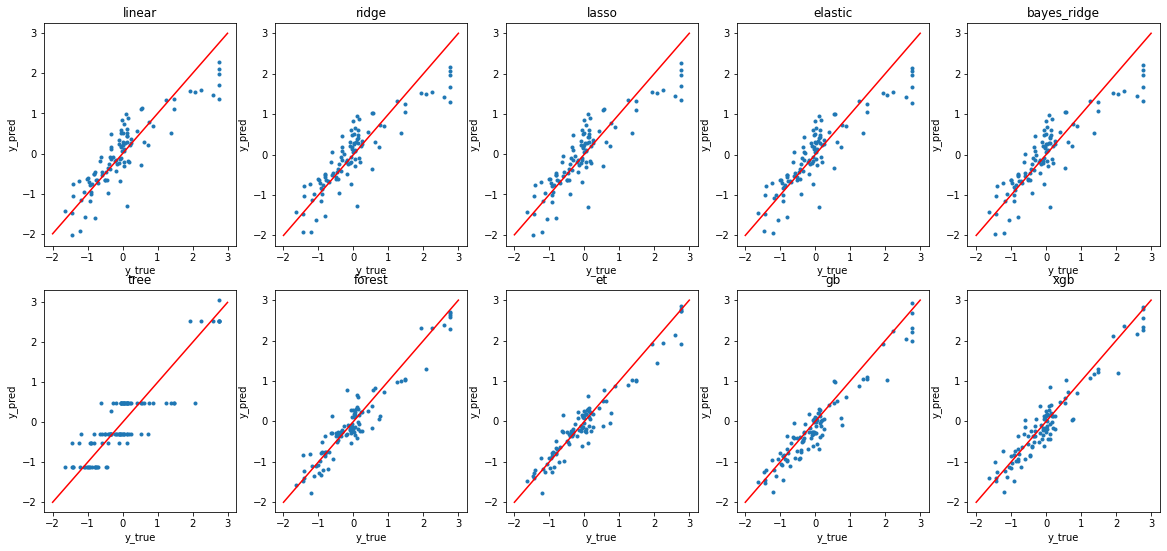

,mse,rmse,mae,nmae,mape,r2
linear,0.222000,0.471000,0.362000,0.521000,579.145000,0.778000
ridge,0.220000,0.469000,0.358000,0.515000,594.648000,0.780000
lasso,0.221000,0.470000,0.361000,0.519000,587.754000,0.779000
elastic,0.221000,0.470000,0.360000,0.517000,601.713000,0.779000
bayes_ridge,0.220000,0.469000,0.359000,0.516000,590.402000,0.780000
tree,0.218000,0.467000,0.378000,0.543000,658.168000,0.782000
forest,0.095000,0.308000,0.234000,0.336000,283.617000,0.905000
et,0.079000,0.282000,0.206000,0.297000,238.864000,0.921000
gb,0.105000,0.324000,0.246000,0.353000,201.166000,0.895000
xgb,0.091000,0.301000,0.236000,0.339000,314.087000,0.909000


In [ ]:
df_score = pd.DataFrame()
plt.figure(figsize = (20,9))
for idx, model in enumerate(['linear', 'ridge', 'lasso', 'elastic', 
                             'bayes_ridge', 'tree', 'forest', 'et', 'gb', 'xgb']):
    y_pred = eval(model).predict(X_test)
    df_score = pd.concat([df_score, pd.DataFrame(regression_scores(y_test, y_pred) ,index=[model]) ])

    plt.subplot(2,5, idx + 1)
    plt.title(model)
    plt.scatter(y_test, y_pred, marker = '.')
    plt.plot([-2,3], [-2,3], c = 'r')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
plt.show()
df_score.style.background_gradient(cmap='Greens_r')

## **과제2: 해외 축구 선수 이적료 예측 미션**
---

* https://dacon.io/competitions/open/235538/overview/description
* 수업 시간에 배운 내용들을 적용하여 이적료 예측을 진행하고 리더보드에 결과를 제출합니다.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_test = pd.read_csv('/content/FIFA_test.csv')

In [ ]:
df = pd.read_csv('/content/FIFA_train.csv')
print(df.shape)
df.head()
# 'value'  = y

(8932, 12)


,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [ ]:
# 간단한 전처리
df.drop(['id', 'name'], axis = 1, inplace = True)
df_test.drop(['id', 'name'], axis = 1, inplace = True)

In [ ]:
for col in df.columns:
    n_unique = len(df[col].unique())
    print(col, n_unique)

age 25
continent 5
contract_until 17
position 4
prefer_foot 2
reputation 5
stat_overall 46
stat_potential 45
stat_skill_moves 5
value 198


In [ ]:
df.describe(include = 'object')

,continent,contract_until,position,prefer_foot
count,8932,8932,8932,8932
unique,5,17,4,2
top,europe,2019,MF,right
freq,5322,2366,3428,6837


In [ ]:
# fig, axes = plt.subplots(2,5, figsize = (20,6))
# axes = axes.flatten()
# for col, ax in zip(df.columns, axes):
#     sns.histplot(data = df, x = col, ax = ax)
# plt.show()

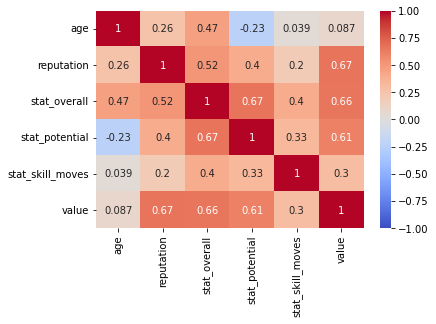

In [ ]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, vmax = 1, vmin = -1)

#### 데이터 전처리

In [ ]:
# contract_until 전처리
df['contract_until'].unique()

array(['2021', '2020', '2019', '2023', '2022', '2024', 'Jun 30, 2019',
       '2026', 'Dec 31, 2018', '2018', '2025', 'Jun 30, 2020',
       'May 31, 2020', 'May 31, 2019', 'Jan 31, 2019', 'Jan 1, 2019',
       'Jan 12, 2019'], dtype=object)

In [ ]:
df_test['contract_until'].unique()

array(['2022', '2023', '2020', '2021', 'Jun 30, 2019', '2019', '2025',
       '2024', '2018', 'May 31, 2020', 'Jun 30, 2020', 'May 31, 2019',
       'Dec 31, 2019', 'Dec 31, 2018', 'Jun 1, 2019', 'Jan 1, 2019',
       'Jan 31, 2019', '2026'], dtype=object)

In [ ]:
df['contract_until'][df['contract_until'].str.contains('2018')] = '2018' 
df['contract_until'][df['contract_until'].str.contains('2019')] = '2019' 
df['contract_until'][df['contract_until'].str.contains('2020')] = '2020' 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
df_test['contract_until'][df_test['contract_until'].str.contains('2018')] = '2018' 
df_test['contract_until'][df_test['contract_until'].str.contains('2019')] = '2019' 
df_test['contract_until'][df_test['contract_until'].str.contains('2020')] = '2020' 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
df['contract_until'] = df['contract_until'].astype('int64')
df['contract_until'] = df['contract_until'] - 2018
df.rename(columns = {'contract_until':'contract_left'}, inplace = True)

In [ ]:
df_test['contract_until'] = df_test['contract_until'].astype('int64')
df_test['contract_until'] = df_test['contract_until'] - 2018
df_test.rename(columns = {'contract_until':'contract_left'}, inplace = True)

In [ ]:
# 'continent','position','prefer_foot' encoding
df = pd.get_dummies(data = df, columns = ['continent','position','prefer_foot'])
df_test = pd.get_dummies(data = df_test, columns = ['continent','position','prefer_foot'])

##### 데이터 분할

In [ ]:
# # 넘파이 변환
# X = train.iloc[:, :-1].values
# y = train.iloc[:, -1].values

# # 데이터 분할
# X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, 
#                                                     random_state=1)

# 넘파이 변환(df_test)
# X = df_test.values

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('value', axis = 1)
y = df['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7145, 17), (1787, 17), (7145,), (1787,))

##### 스케일링 

In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일링
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)

# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
# y_test = sc_y.fit_transform(y_test[:, np.newaxis]).flatten()

# df_test 스케일링 
df_test = sc_x.transform(df_test) # 위 넘파이로 변형했으면 X_test = sc_x.transform(X)

In [ ]:
# 스케일링 (로그)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform( np.expand_dims(y_train, 1) ).flatten()
#y_valid = sc_y.transform( np.expand_dims(y_valid, 1) ).flatten()

y_train = np.log10(y_train)
y_test = np.log10(y_test)

#### 모델링

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs( (y_true-y_pred) / y_true) ) * 100

def norm_mean_absolute_error(y_true, y_pred):
  return mean_absolute_error(y_true, y_pred)/np.mean(np.abs(y_true))

def regression_scores(y_true,y_pred):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  mae = mean_absolute_error(y_true, y_pred)
  nmae = norm_mean_absolute_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  return {'mse':np.round(mse,3), 'rmse':np.round(rmse,3), 'mae':np.round(mae,3), 'nmae':np.round(nmae,3), 'mape':np.round(mape,3), 'r2':np.round(r2,3) }

In [ ]:
from sklearn.linear_model import * 

# linear
linear = LinearRegression()
linear.fit(X_train, y_train)

# ridge
ridge = Ridge(alpha = 0.1,  random_state = 1)
ridge.fit(X_train, y_train)

 # lasso
lasso = Lasso(alpha = 0.1, random_state = 1)
lasso.fit(X_train, y_train)

# elastic 
elastic = ElasticNet(alpha = 0.1,  random_state = 1)
elastic.fit(X_train, y_train)

# bayes_ridge
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train, y_train)

BayesianRidge()

In [ ]:
# tree (결정트리 회귀)
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 1, max_depth = 3)
tree.fit(X_train, y_train)

# forest (Random Forest Regressor)
from sklearn.ensemble import *
forest = RandomForestRegressor(random_state = 1)
forest.fit(X_train, y_train)

# et (Extra Tree Regressor)
et = ExtraTreesRegressor(random_state = 1)
et.fit(X_train, y_train)

# gb (Gradient Boosting Regressor)
gb = GradientBoostingRegressor(random_state = 1)
gb.fit(X_train, y_train)

 # xgb (XGBoost Regressor)
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 1)
xgb.fit(X_train, y_train)

[08:33:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=1)

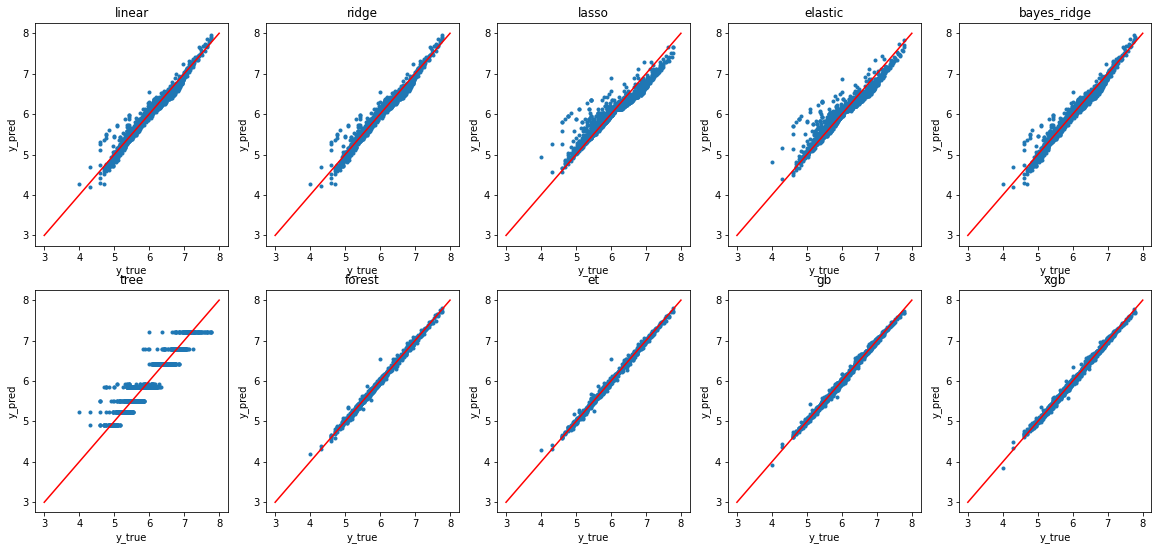

,mse,rmse,mae,nmae,mape,r2
linear,0.013000,0.112000,0.080000,0.013000,1.364000,0.965000
ridge,0.013000,0.112000,0.080000,0.013000,1.363000,0.965000
lasso,0.039000,0.199000,0.132000,0.022000,2.221000,0.890000
elastic,0.030000,0.175000,0.114000,0.019000,1.910000,0.915000
bayes_ridge,0.013000,0.112000,0.080000,0.013000,1.363000,0.965000
tree,0.045000,0.211000,0.157000,0.026000,2.672000,0.876000
forest,0.001000,0.036000,0.021000,0.003000,0.351000,0.996000
et,0.001000,0.036000,0.019000,0.003000,0.325000,0.996000
gb,0.001000,0.038000,0.027000,0.005000,0.462000,0.996000
xgb,0.002000,0.041000,0.029000,0.005000,0.501000,0.995000


In [ ]:
df_score = pd.DataFrame()
plt.figure(figsize = (20, 9))
for idx, model in enumerate(['linear', 'ridge', 'lasso', 'elastic', 'bayes_ridge', 
                             'tree', 'forest', 'et', 'gb', 'xgb']):
 # 모델별 학습 및 예측
#  eval(model).fit(X_train, y_train)
  y_pred = eval(model).predict(X_test)
  
  # 실제-예측 산점도
  plt.subplot(2,5,idx+1)
  plt.title(model)
  plt.scatter(y_test, y_pred, marker='.')
  plt.plot([3,8],[3,8], c='r')
  plt.xlabel('y_true')
  plt.ylabel('y_pred')
  
  # 성능 평가
  df_score = pd.concat([df_score, pd.DataFrame(regression_scores(y_test, y_pred) ,index=[model]) ])

plt.show()
df_score.style.background_gradient(cmap='Greens_r')

In [ ]:
# rmse를 기준으로 gb (Gradient Boosting Regressor)가 가장 좋은 성능을 보였음.

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 1)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

#### 테스트셋 적용

In [ ]:
y_pred = gb.predict(df_test)

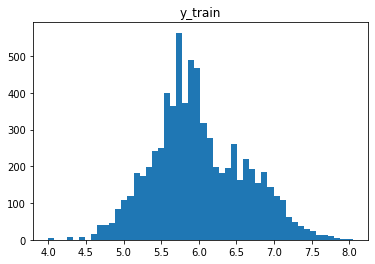

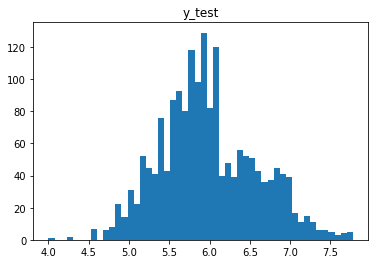

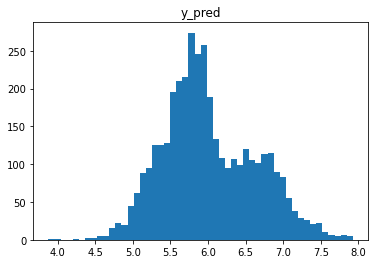

In [ ]:
for y in ['y_train','y_test','y_pred']:
    plt.hist(eval(y), bins = 50)
    plt.title(y)
    plt.show()

In [ ]:
# y_final = sc_y.inverse_transform(y_pred.reshape(-1,1))
y_final = 10**(y_pred)

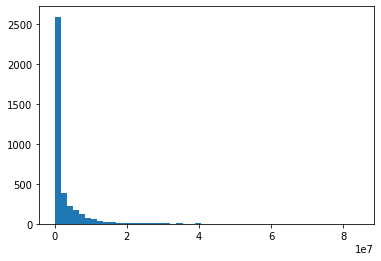

In [ ]:
_ = plt.hist(y_final, bins = 50)

In [ ]:
y_final

array([5.40572426e+07, 8.43357257e+07, 7.45589305e+07, ...,
       6.02662017e+04, 5.35392028e+04, 5.33988862e+04])

In [ ]:
sub = pd.read_csv('/content/submission.csv')
sub.head()

,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0


In [ ]:
sub['value'] = y_final

In [ ]:
sub.head()

,id,value
0,1,5.405724e+07
1,2,8.433573e+07
2,4,7.455893e+07
3,5,8.433573e+07
4,6,5.136377e+07


In [ ]:
sub.to_csv('/content/sample_data/subforfun.csv', index = False)